### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Stroke Dataset: Loading

* Stroke prediction dataset (gathered from kaggle. Author: Fedesoriano. Name: Stroke-prediction-dataset)
* The purpose of the dataset is to forecast the possibility of an individual having a stroke, utilising input parameters such as gender, age, presence of different ailments, and smoking status. Each row of data provides pertinent information about the patient.
* The dataset includes 5110 rows and 12 columns, with each row representing a different patient and each column representing a different attribute or feature. The columns in the dataset are:

   
Variable | Description
----------|--------------
iD | Unique identifier for each patient
gender | Gender of the patient (Male/Female/Other)
age | Age of the patient in years
hypertension | Whether the patient has hypertension or not (0 - No, 1 - Yes)
heart_disease | Whether the patient has heart disease or not (0 - No, 1 - Yes)
ever_married | Whether the patient has ever been married or not (Yes/No) 
work_type | Type of occupation of the patient (Private, Self-employed, Govt_job, children, Never_worked)
Residence_type | Area type of residence of the patient (Urban/Rural)
avg_glucose_level | Average glucose level in the patient's blood
bmi | Body mass index of the patient
smoking_status | Habitual infromation, patient's smoking status (formerly smoked, never smoked, smokes, unknown)
stroke | Whether the patient has had a stroke or not (0 - No, 1 - Yes)

In [2]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


##### Checking the summary of statistics for each column of the DataFrame

In [4]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
stroke_data.info() # this is to obtain basic information about a DataFrame, and is often used as a first step in exploring and understanding a the present dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Calculating the mean of the 'bmi' column
mean_value = stroke_data ['bmi'].mean()
stroke_data ['bmi'].fillna(value = mean_value, inplace = True)

In [7]:
stroke_data.head(10)
# it can be seen that all the missing values have been replaced by the mean

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


## Exploratory Data Analysis (EDA)

###### Calculating the mean inside the 'bmi' attribute and replacing all the null and missing values with the mean

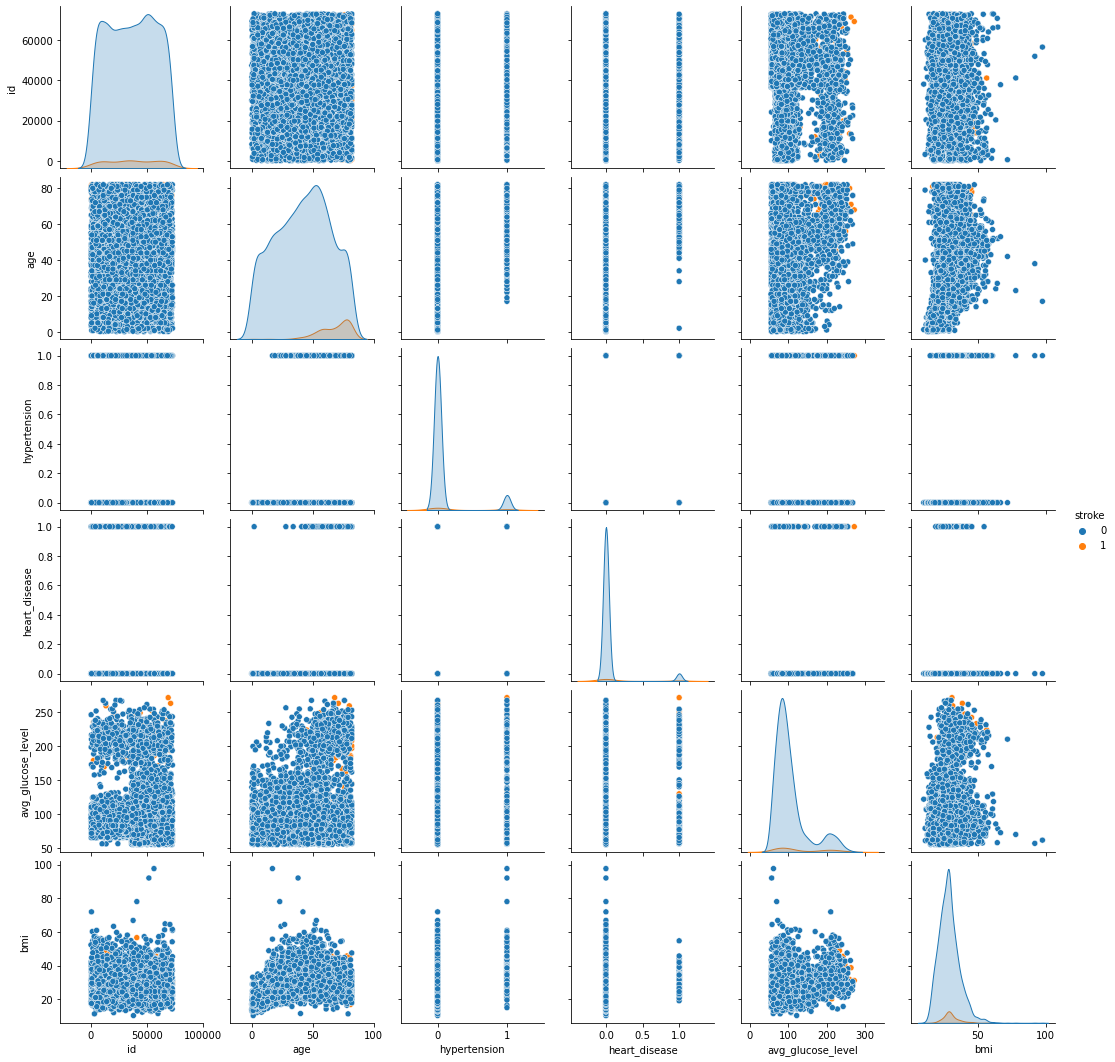

In [8]:
sns.pairplot(stroke_data, hue="stroke")

#### Distribution by Gender

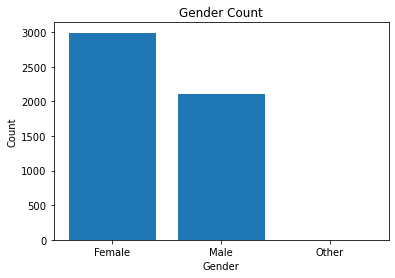

In [9]:
# Count the occurences of each gender
gender_count = stroke_data['gender'].value_counts()

# Plotting a Bar chart
plt.bar(gender_count.index, gender_count.values)

# Adding the labels and the char title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')

plt.show()

In [10]:
gender_count

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

##### Distribution by Smoking Status

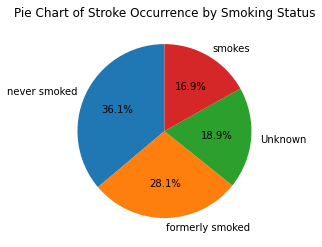

In [11]:
#Pie chart of stroke occurrence by smoking status
smoking_stroke = stroke_data[stroke_data["stroke"] == 1]["smoking_status"].value_counts()
plt.pie(smoking_stroke, labels=smoking_stroke.index, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Stroke Occurrence by Smoking Status")
plt.show()

##### Distribution by Heart Disease

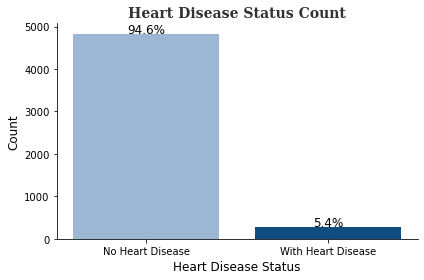

In [12]:
# Count the occurrences of each heart disease status
hd_count = stroke_data['heart_disease'].value_counts()

# Plotting a bar chart
plt.bar(['No Heart Disease', 'With Heart Disease'], hd_count.values, color=['#9bb7d4', '#0f4c81'])

# Adding the labels and the chart title
plt.xlabel('Heart Disease Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Heart Disease Status Count', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

# Adding the percentage values above the bars
for i, count in enumerate(hd_count.values):
    plt.text(i, count+10, str(round((count/len(stroke_data))*100, 1)) + '%', ha='center', fontsize=12)

# Removing the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjusting the layout
plt.tight_layout()

plt.show()


#### Distribution of Frequency by Age

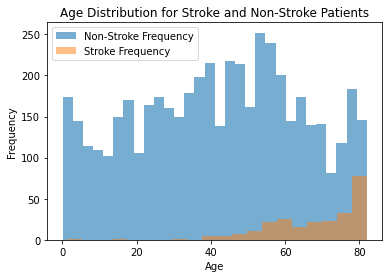

In [13]:
#this is to check stroke frequency by age

stroke_positive = stroke_data[stroke_data['stroke'] == 1]
stroke_negative = stroke_data[stroke_data['stroke'] == 0]

# Plot the age distributions for stroke and non-stroke patients
plt.hist(stroke_negative['age'], bins=30, alpha=0.6, label='Non-Stroke Frequency')
plt.hist(stroke_positive['age'], bins=20, alpha=0.5, label='Stroke Frequency')
plt.title('Age Distribution for Stroke and Non-Stroke Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

#### Distribution by Stroke and Glucose Levels

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

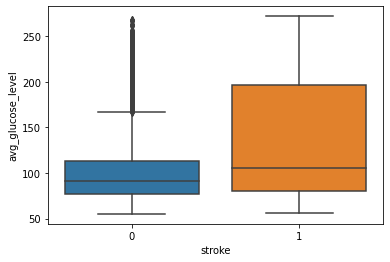

In [14]:
#Box plot of glucose levels by stroke occurrence
sns.boxplot(x="stroke", y="avg_glucose_level", data=stroke_data)

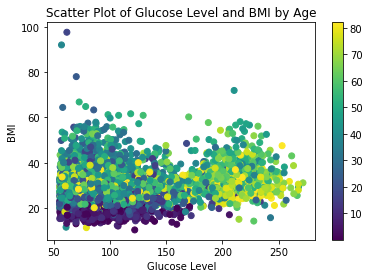

In [15]:
#Scatter plot of glucose level and BMI by age:
plt.scatter(stroke_data["avg_glucose_level"], stroke_data["bmi"], c=stroke_data["age"], cmap="viridis")
plt.xlabel("Glucose Level")
plt.ylabel("BMI")
plt.title("Scatter Plot of Glucose Level and BMI by Age")
plt.colorbar()
plt.show()

#### Distribution Gender and BMI scores

<AxesSubplot:xlabel='gender', ylabel='bmi'>

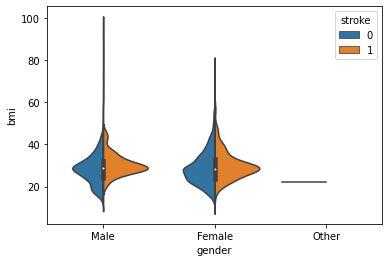

In [16]:
#Violin plot of BMI by stroke occurrence and gender
sns.violinplot(x="gender", y="bmi", hue="stroke", data=stroke_data, split=True)

#### Distribution frequency of Stroke occurances by Age

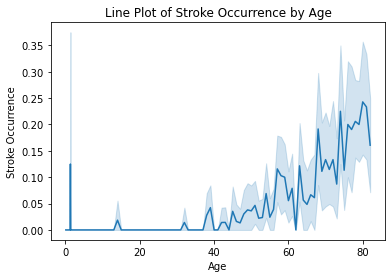

In [17]:
#Line plot of stroke occurrence by age
sns.lineplot(x="age", y="stroke", data=stroke_data)
plt.xlabel("Age")
plt.ylabel("Stroke Occurrence")
plt.title("Line Plot of Stroke Occurrence by Age")
plt.show()

#### Distribution of Stroke patients filtered by Hypertension

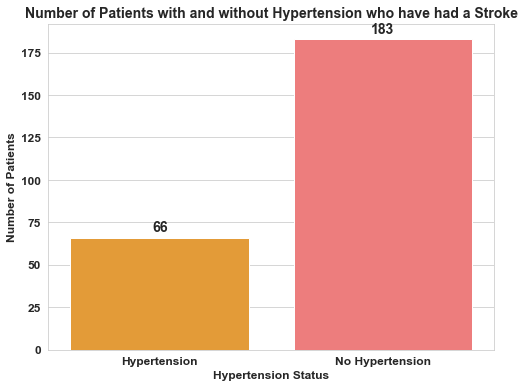

In [18]:
# Count the number of patients with and without hypertension who have had a stroke
hypertension_stroke = stroke_data.loc[(stroke_data['hypertension'] == 1) & (stroke_data['stroke'] == 1)].shape[0]
no_hypertension_stroke = stroke_data.loc[(stroke_data['hypertension'] == 0) & (stroke_data['stroke'] == 1)].shape[0]

# Create a bar chart to visualize the results
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
ax = sns.barplot(x=['Hypertension', 'No Hypertension'], y=[hypertension_stroke, no_hypertension_stroke], palette=['#FF9F1C', '#FF6B6B'])
plt.title('Number of Patients with and without Hypertension who have had a Stroke', fontsize=14, fontweight='bold')
plt.xlabel('Hypertension Status', fontsize=12, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=14, fontweight='bold')
plt.show()

### Dataset Pre-Processing

##### Dropping unwanted variables

In [19]:
# Removing the 'id' column as it is redundant in this case
stroke_data = stroke_data.drop('id', axis=1)

In [20]:
#This is to take of the decimal value in age
stroke_data['age'] = stroke_data['age'].astype(int)

In [21]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


#### Replacing the non-numerical categorical values with the numerical integers

In [22]:
# Creating a dictionary to map non-numerical values with the numerical integers
gender_mapping = {'Male': 0, 'Female':1, 'Other':2} # this is to replace the gender values from 'Male', 'Female' to '1', '2'
# replace non-numerical values with numerical values using the mapping dictionary
stroke_data['gender'] = stroke_data['gender'].replace(gender_mapping)
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,0,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,1,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [23]:
# Replcing the 'ever_married' values from non numerical to numeriacal integers
marr_mapping = {'Yes':0, 'No':1}
stroke_data['ever_married'] = stroke_data['ever_married'].replace(marr_mapping)

In [24]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,0,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,61,0,0,0,Self-employed,Rural,202.21,28.893237,never smoked,1
2,0,80,0,1,0,Private,Rural,105.92,32.500000,never smoked,1
3,1,49,0,0,0,Private,Urban,171.23,34.400000,smokes,1
4,1,79,1,0,0,Self-employed,Rural,174.12,24.000000,never smoked,1


In [25]:
# Replcing the 'work_type' values from non numerical to numeriacal integers
stroke_data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [26]:
work_mapping = {'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4} 
stroke_data['work_type'] = stroke_data['work_type'].replace(work_mapping)
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,0,0,Urban,228.69,36.600000,formerly smoked,1
1,1,61,0,0,0,1,Rural,202.21,28.893237,never smoked,1
2,0,80,0,1,0,0,Rural,105.92,32.500000,never smoked,1
3,1,49,0,0,0,0,Urban,171.23,34.400000,smokes,1
4,1,79,1,0,0,1,Rural,174.12,24.000000,never smoked,1


In [27]:
# Replcing the 'Residence_type' values from non numerical to numeriacal integers
stroke_data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [28]:
res_mapping = {'Urban':0, 'Rural':1}
stroke_data['Residence_type'] = stroke_data['Residence_type'].replace(res_mapping)
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,0,0,0,228.69,36.600000,formerly smoked,1
1,1,61,0,0,0,1,1,202.21,28.893237,never smoked,1
2,0,80,0,1,0,0,1,105.92,32.500000,never smoked,1
3,1,49,0,0,0,0,0,171.23,34.400000,smokes,1
4,1,79,1,0,0,1,1,174.12,24.000000,never smoked,1


In [29]:
# Replcing the 'smoking_status' values from non numerical to numeriacal integers
stroke_data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [30]:
res_mapping = {'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3} 
stroke_data['smoking_status'] = stroke_data['smoking_status'].replace(res_mapping)

In [31]:
# Now all the non-numerical categorical values are replaced with Integers
stroke_data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,0,0,0,228.69,36.600000,0,1
1,1,61,0,0,0,1,1,202.21,28.893237,1,1
2,0,80,0,1,0,0,1,105.92,32.500000,1,1
3,1,49,0,0,0,0,0,171.23,34.400000,2,1
4,1,79,1,0,0,1,1,174.12,24.000000,1,1
5,0,81,0,0,0,0,0,186.21,29.000000,0,1
6,0,74,1,1,0,0,1,70.09,27.400000,1,1
7,1,69,0,0,1,0,0,94.39,22.800000,1,1
8,1,59,0,0,0,0,1,76.15,28.893237,3,1
9,1,78,0,0,0,0,0,58.57,24.200000,3,1


In [32]:
# this is to check the correlation
stroke_data.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.027404,-0.021390,-0.085749,-0.029366,-0.066212,-0.005529,-0.054213,0.025110,-0.039693,-0.009200
age,0.027404,1.000000,0.276303,0.263668,-0.679181,-0.413852,-0.014169,0.238060,0.326271,-0.376142,0.245128
hypertension,-0.021390,0.276303,1.000000,0.108306,-0.164243,-0.075097,0.007913,0.174474,0.160189,-0.129012,0.127904
heart_disease,-0.085749,0.263668,0.108306,1.000000,-0.114644,-0.058263,-0.003092,0.161857,0.038899,-0.064671,0.134914
ever_married,-0.029366,-0.679181,-0.164243,-0.114644,1.000000,0.375944,0.006261,-0.155068,-0.335705,0.303694,-0.108340
work_type,-0.066212,-0.413852,-0.075097,-0.058263,0.375944,1.000000,-0.014573,-0.068135,-0.341973,0.307774,-0.058224
Residence_type,-0.005529,-0.014169,0.007913,-0.003092,0.006261,-0.014573,1.000000,0.004946,0.000120,-0.004656,-0.015458
avg_glucose_level,-0.054213,0.238060,0.174474,0.161857,-0.155068,-0.068135,0.004946,1.000000,0.168751,-0.097732,0.131945
bmi,0.025110,0.326271,0.160189,0.038899,-0.335705,-0.341973,0.000120,0.168751,1.000000,-0.230553,0.038947
smoking_status,-0.039693,-0.376142,-0.129012,-0.064671,0.303694,0.307774,-0.004656,-0.097732,-0.230553,1.000000,-0.066393


<AxesSubplot:>

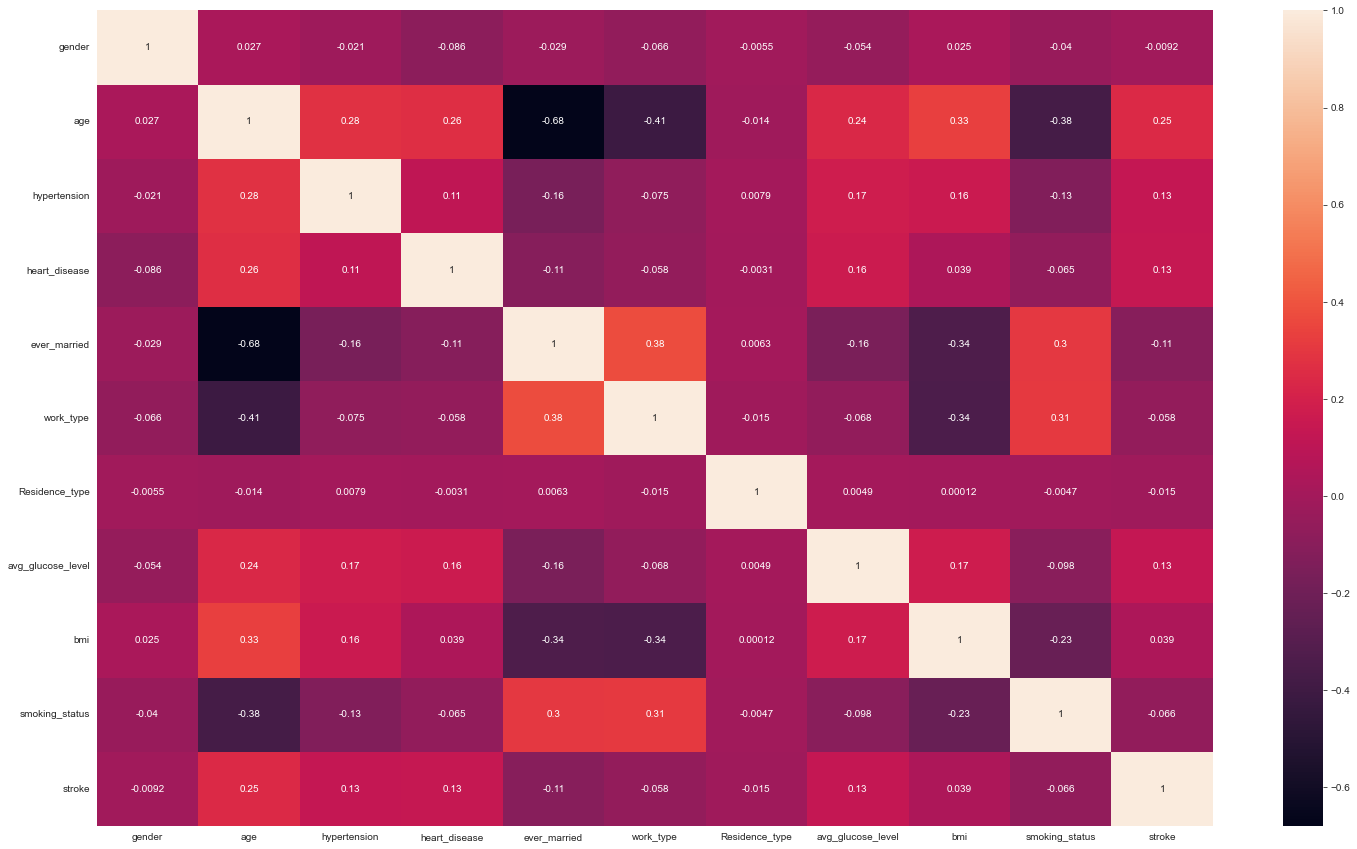

In [33]:
plt.figure(figsize=(25,15))
sns.heatmap(stroke_data.corr(),annot=True)

### Splitting the dataset into dependant and independant variables

In [34]:
X = stroke_data.drop(['stroke'], axis=1) 
y = stroke_data['stroke']

#### Class Distribution

In [35]:
# Checking the class distribution of the target variable
class_dist = pd.Series(y).value_counts(normalize=True)
print("Class distribution:\n{}".format(class_dist))

Class distribution:
0    0.951272
1    0.048728
Name: stroke, dtype: float64


#### Creating a baseline prediction

In [36]:
# Creating a baseline prediction that always predicts the majority class (0) for the test set
baseline_pred = np.zeros(len(y))

# Calculating the accuracy of the baseline prediction for the test set
baseline_acc = sum(baseline_pred == y) / len(y)

print("Baseline accuracy: {:.2f}%".format(baseline_acc * 100))

Baseline accuracy: 95.13%


### Machine Learning Models

#### 1: Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [38]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [39]:
# Checking the class distribution of the target variable
class_dist = pd.Series(y_train).value_counts(normalize=True)
print("Class distribution:\n{}".format(class_dist))

Class distribution:
0    0.9512
1    0.0488
Name: stroke, dtype: float64


In [40]:
# Checking the class distribution of the target variable
class_dist = pd.Series(y_test).value_counts(normalize=True)
print("Class distribution:\n{}".format(class_dist))

Class distribution:
0    0.951487
1    0.048513
Name: stroke, dtype: float64


In [41]:
# Standardising the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Normalising the data
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train_scaled)
X_test_norm = normalizer.transform(X_test_scaled)

##### Dummy classifer to perform baseline accuracy score

In [42]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_scaled, y_train)
DummyClassifier(strategy='most_frequent')
#dummy_clf.predict(X_test_scaled)
dummy_clf.score(X_test_scaled, y_test)

0.9514866979655712

### Training the Logistic Regression Classifier on the given training dataset

In [43]:
# Creating a logistic regression model object
logreg = LogisticRegression(penalty = "l2", C = 10, solver = "newton-cg")

# Fitting the model on the training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=10, solver='newton-cg')

### Testing the Logistic Regression Classifier on testing dataset

In [44]:
# Predicting the labels of the test data
y_pred = logreg.predict(X_test_scaled)

# Printing the accuracy score of the model
print("Accuracy of the model on the test set is : {:.2f}".format(logreg.score(X_test_scaled, y_test)))

Accuracy of the model on the test set is : 0.95


In [45]:
#Performing the k-fold cross-validation on the LR model
# here we define k=5
scores = cross_val_score(logreg, X, y, cv=5)

# Printing the accuracy for each fold and the mean accuracy across all folds
for i, score in enumerate(scores):
    print("Fold {} accuracy: {:.2f}%".format(i+1, score * 100))
print("Mean accuracy: {:.2f}%".format(scores.mean() * 100))
print("Standard deviation: {:.2f}%".format(scores.std() * 100))

Fold 1 accuracy: 95.11%
Fold 2 accuracy: 95.11%
Fold 3 accuracy: 95.11%
Fold 4 accuracy: 95.01%
Fold 5 accuracy: 95.21%
Mean accuracy: 95.11%
Standard deviation: 0.06%


### The ROC (Receiver Operating Characteristic) curve graphical representation

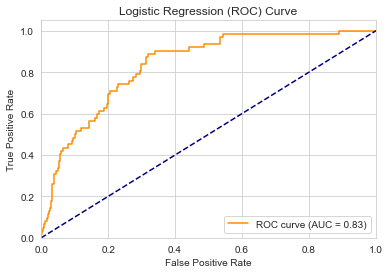

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predicting the probability scores of the test data
y_prob = logreg.predict_proba(X_test_norm)

# Computing the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

# Computing the AUC score
auc_score = roc_auc_score(y_test, y_prob[:,1])

# Creating a ROC curve plot
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 2. Support Vector Machine (SVM)

In [47]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Training the SVM Classifier on the given training dataset

In [48]:
# Training the SVM classifier on the standardised data
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=0)

### Testing the SVM Classifier on testing dataset

In [49]:
# Evaluating the classifier on the testing data
score = svm.score(X_test_scaled, y_test)
print("Accuracy of SVM Classifier on Testing Dataset:", score)

Accuracy of SVM Classifier on Testing Dataset: 0.9514866979655712


In [50]:
# Performing k-fold cross-validation on the SVM model
scores = cross_val_score(svm, X, y, cv=5)

# Printing the accuracy for each fold and the mean accuracy across all folds
for i, score in enumerate(scores):
    print("Fold {} accuracy: {:.2f}%".format(i+1, score * 100))
print("Mean accuracy: {:.2f}%".format(scores.mean() * 100))
print("Standard deviation: {:.2f}%".format(scores.std() * 100))

Fold 1 accuracy: 95.11%
Fold 2 accuracy: 95.11%
Fold 3 accuracy: 95.11%
Fold 4 accuracy: 95.11%
Fold 5 accuracy: 95.21%
Mean accuracy: 95.13%
Standard deviation: 0.04%


### Plotting the SVM ROC representation

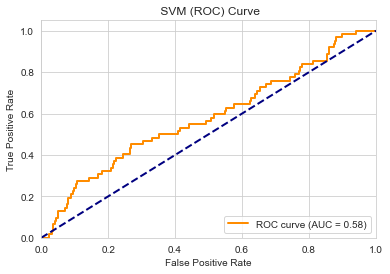

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Computing the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, svm.decision_function(X_test_scaled))

# Computing the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' SVM (ROC) Curve')
plt.legend(loc="lower right")
plt.show()